In [18]:
import numpy as np
import math
from scipy.signal import convolve2d
from matplotlib import pyplot as plt
from data import data
import cv2
import os
from PIL import Image

In [2]:
def conv2(x, base):
    y = np.array([[1, -1]])
    if base == 'h':
        return np.rot90(convolve2d(np.rot90(x, 2), np.rot90(y, 2), mode='same'), 2)
    if base == 'v':
        return np.rot90(convolve2d(np.rot90(x, 2), np.rot90(y, 1), mode='same'), 2)

def im2col(A, size):
    M, N = A.shape
    col = N - size[1] + 1
    row = M - size[0] + 1
    
    start_idx = (np.arange(size[0])[:, None]*N + np.arange(size[1])).T 
    end_idx = (np.arange(row)[:, None]*N + np.arange(col)).T

    return np.take(A, start_idx.ravel()[:, None] + end_idx.ravel()[::1])

def caoICME10(I, d, tau):
    np.clip(I, 0, 255, out=I)
    I = I.astype('uint8')
    I = np.double(I)
    nh, nw = I.shape
    hlfwins = math.ceil(d/2)

    forDMap_r = conv2(I, 'h') == 0
    forDMap_r = forDMap_r[hlfwins:-hlfwins, hlfwins:-hlfwins]
    forDMap_c = conv2(I, 'v') == 0
    forDMap_c = forDMap_c[hlfwins:-hlfwins, hlfwins:-hlfwins]

    z = im2col(I, (2*hlfwins+1, 2*hlfwins+1))

    varMap = (np.var(z, axis=0, ddof=1).reshape(nw-2*hlfwins, nh-2*hlfwins)).T
    varMap = varMap >= tau
    
    f_r = np.sum(forDMap_r*varMap)/np.sum(varMap)
    f_c = np.sum(forDMap_c*varMap)/np.sum(varMap)

    f = (f_r+f_c)/np.sqrt(2)
    return f

In [3]:
import cv2

I = cv2.imread('ucid00003.tif', 0)
caoICME10(I, 7, 100)

0.06296406347765206

In [5]:
os.getcwd()

'/mnt/drive2/msc_2020/Research/Code'

In [10]:
import os

os.chdir("/mnt/drive2/msc_2020/ucid.v2")
original = []

for i in range(1, 1339):
    if i%100==0 or i==1338:
        print(i)
    name = 'ucid0'+str(i).zfill(4)+'.tif'
    I = cv2.imread(name, 0)
    original.append(caoICME10(I, 7, 100))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300


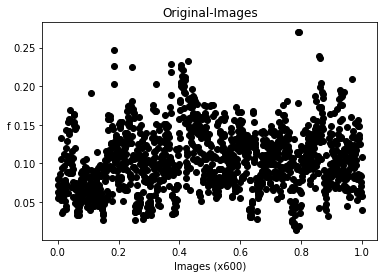

In [11]:
from matplotlib import pyplot as plt

plt.scatter(np.arange(0, 1, 1/1338), original, color='k')
plt.title('Original-Images')
plt.xlabel("Images (x600)")
plt.ylabel("f").set_rotation(0)

In [12]:
os.chdir("/mnt/drive2/msc_2020/Research/Code/Data")

with open('original.txt', 'w') as out:
    for i in original:
        out.write(str(i)+'\n')

In [14]:
import os

os.chdir("/mnt/drive2/msc_2020/Research/ucid.v2")

with open('median5x5.txt', 'w') as out:
    for i in range(1, 1339):
        if i%100==0 or i==1338:
            print(i)
        name = 'ucid0'+str(i).zfill(4)+'.tif'
        I = cv2.imread(name, 0)
        I = cv2.medianBlur(I,5)
        out.write(str(caoICME10(I, 7, 100))+'\n')
        
with open('median7x7.txt', 'w') as out:
    for i in range(1, 1339):
        if i%100==0 or i==1338:
            print(i)
        name = 'ucid0'+str(i).zfill(4)+'.tif'
        I = cv2.imread(name, 0)
        I = cv2.medianBlur(I,7)
        out.write(str(caoICME10(I, 7, 100))+'\n')
        
with open('median9x9.txt', 'w') as out:
    for i in range(1, 1339):
        if i%100==0 or i==1338:
            print(i)
        name = 'ucid0'+str(i).zfill(4)+'.tif'
        I = cv2.imread(name, 0)
        I = cv2.medianBlur(I,9)
        out.write(str(caoICME10(I, 7, 100))+'\n')

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1338
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1338
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1338


In [38]:
# To create jpeg compressed images
os.chdir("/mnt/drive2/msc_2020/ucid.v2/MF5")
# for i in range(1, 1339):
#     img = 'ucid'+(str(i).zfill(5))+'.tif'
#     I = Image.open(img)
#     name, ext = img.split('.')
#     image = os.path.join(f'./MF5jpeg95/{name}.jpeg')
#     I.save(image,"JPEG", quality=95)

# For creating MF5 images
# for i in range(1, 1339):
#     name = 'ucid'+(str(i).zfill(5))+'.tif'
#     I = cv2.imread(name, 0)
#     Imf = cv2.medianBlur(I, 5)
#     cv2.imwrite(f'./MF5/{name}', Imf)

In [11]:
# os.chdir("/mnt/drive2/msc_2020/ucid.v2/images_jpeg55")

# with open('jpeg55.txt', 'w') as out:
#     for i in range(1, 1339):
#         name = 'ucid0'+str(i).zfill(4)+'.jpeg'
#         I = cv2.imread(name, 0)        
#         out.write(str(caoICME10(I, 7, 100))+'\n')
#         if i % 200 == 0:
#             print(i)
# print('Done')
# os.chdir("/mnt/drive2/msc_2020/ucid.v2/images_jpeg75")
# with open('jpeg75.txt', 'w') as out:
#     for i in range(1, 1339):
#         name = 'ucid0'+str(i).zfill(4)+'.jpeg'
#         I = cv2.imread(name, 0)        
#         out.write(str(caoICME10(I, 7, 100))+'\n')
#         if i % 200 == 0:
#             print(i)
# print('Done') 
# os.chdir("/mnt/drive2/msc_2020/ucid.v2/images_jpeg95")
# with open('jpeg95.txt', 'w') as out:
#     for i in range(1, 1339):
#         name = 'ucid0'+str(i).zfill(4)+'.jpeg'
#         I = cv2.imread(name, 0)        
#         out.write(str(caoICME10(I, 7, 100))+'\n')
#         if i % 200 == 0:
#             print(i)
# print('Done')

Done
200
400
600
800
1000
1200
Done


In [29]:
os.chdir("/mnt/drive2/msc_2020/Research/ucid.v2")

with open('Average3x3.txt', 'w') as out:
    for i in range(1, 1339):
        if i%100==0 or i==1338:
            print(i)
        name = 'ucid0'+str(i).zfill(4)+'.tif'
        I = cv2.imread(name, 0)
        I = cv2.blur(I,(3,3))
        out.write(str(caoICME10(I, 7, 100))+'\n')
        
with open('Average5x5.txt', 'w') as out:
    for i in range(1, 1339):
        if i%100==0 or i==1338:
            print(i)
        name = 'ucid0'+str(i).zfill(4)+'.tif'
        I = cv2.imread(name, 0)
        I = cv2.blur(I,(5,5))
        out.write(str(caoICME10(I, 7, 100))+'\n')

with open('Gaussian3x3.txt', 'w') as out:
    for i in range(1, 1339):
        if i%100==0 or i==1338:
            print(i)
        name = 'ucid0'+str(i).zfill(4)+'.tif'
        I = cv2.imread(name, 0)
        I = cv2.GaussianBlur(I, (3, 3), 0)
        out.write(str(caoICME10(I, 7, 100))+'\n')
        
with open('Gaussian5x5.txt', 'w') as out:
    for i in range(1, 1339):
        if i%100==0 or i==1338:
            print(i)
        name = 'ucid0'+str(i).zfill(4)+'.tif'
        I = cv2.imread(name, 0)
        I = cv2.GaussianBlur(I, (5, 5), 0)
        out.write(str(caoICME10(I, 7, 100))+'\n')

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1338


In [41]:
os.chdir("/mnt/drive2/msc_2020/Research/ucid.v2")

with open('bilinear_scaled0.6.txt', 'w') as out:
    for i in range(1, 1339):
        name = 'ucid0'+str(i).zfill(4)+'.tif'
        I = cv2.imread(name, 0)
        dim = (int(I.shape[0]*0.6), int(I.shape[1]*0.6))
        I = cv2.resize(I, dim, interpolation = cv2.INTER_LINEAR)
        out.write(str(caoICME10(I, 7, 100))+'\n')
        
with open('bilinear_scaled2.txt', 'w') as out:
    for i in range(1, 1339):
        name = 'ucid0'+str(i).zfill(4)+'.tif'
        I = cv2.imread(name, 0)
        dim = (int(I.shape[0]*2), int(I.shape[1]*2))
        I = cv2.resize(I, dim, interpolation = cv2.INTER_LINEAR)
        out.write(str(caoICME10(I, 7, 100))+'\n')       

In [12]:
# os.chdir("//mnt/drive2/msc_2020/Cao_2010/Code/Data")
os.chdir('./Data')

original = []
with open('original.txt', 'r') as out:
    for _ in range(1338):
        original.append(float(out.readline().strip()))

median3x3 = []
with open('median3x3.txt', 'r') as out:
    for _ in range(1338):
        median3x3.append(float(out.readline().strip()))
        
median5x5 = []
with open('median5x5.txt', 'r') as out:
    for _ in range(1338):
        median5x5.append(float(out.readline().strip()))

median7x7 = []
with open('median7x7.txt', 'r') as out:
    for _ in range(1338):
        median7x7.append(float(out.readline().strip()))
        
median9x9 = []
with open('median9x9.txt', 'r') as out:
    for _ in range(1338):
        median9x9.append(float(out.readline().strip()))

gaussian3x3 = []
with open('Gaussian3x3.txt', 'r') as out:
    for _ in range(1338):
        gaussian3x3.append(float(out.readline().strip()))
        
gaussian5x5 = []
with open('Gaussian5x5.txt', 'r') as out:
    for _ in range(1338):
        gaussian5x5.append(float(out.readline().strip()))

average3x3 = []
with open('Average3x3.txt', 'r') as out:
    for _ in range(1338):
        average3x3.append(float(out.readline().strip()))
        
average5x5 = []
with open('Average5x5.txt', 'r') as out:
    for _ in range(1338):
        average5x5.append(float(out.readline().strip()))
        
bilineardot6 = []
with open('bilinear_scaled0.6.txt', 'r') as out:
    for _ in range(1338):
        bilineardot6.append(float(out.readline().strip()))

bilinear2 = []
with open('bilinear_scaled2.txt', 'r') as out:
    for _ in range(1338):
        bilinear2.append(float(out.readline().strip()))
        
jpeg55 = []
with open('jpeg55.txt', 'r') as out:
    for _ in range(1338):
        jpeg55.append(float(out.readline().strip()))
        
jpeg75 = []
with open('jpeg75.txt', 'r') as out:
    for _ in range(1338):
        jpeg75.append(float(out.readline().strip()))
        
jpeg95 = []
with open('jpeg95.txt', 'r') as out:
    for _ in range(1338):
        jpeg95.append(float(out.readline().strip()))

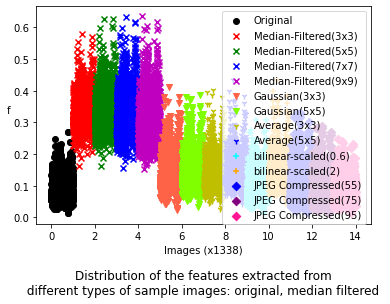

In [13]:
plt.scatter(np.arange(0, 1, 1/1338), original, label= 'Original', color='k')
plt.scatter(np.arange(1, 2, 1/1338), median3x3, label= 'Median-Filtered(3x3)', color='r', marker='x')
plt.scatter(np.arange(2, 3, 1/1338), median5x5, label= 'Median-Filtered(5x5)', color='g', marker='x')
plt.scatter(np.arange(3, 4, 1/1338), median7x7, label='Median-Filtered(7x7)', color='b', marker='x')
plt.scatter(np.arange(4, 5, 1/1338), median9x9, label='Median-Filtered(9x9)', color='m', marker='x')
plt.scatter(np.arange(5, 6, 1/1338), gaussian3x3, label='Gaussian(3x3)', color='tomato', marker='v')
plt.scatter(np.arange(6, 7, 1/1338), gaussian5x5, label='Gaussian(5x5)', color='chartreuse', marker='v')
plt.scatter(np.arange(7, 8, 1/1338), average3x3, label='Average(3x3)' , color='y', marker="1")
plt.scatter(np.arange(8, 9, 1/1338), average5x5, label='Average(5x5)' , color='b', marker="1")
plt.scatter(np.arange(9, 10, 1/1338), bilineardot6, label='bilinear-scaled(0.6)' , color='aqua', marker="+")
plt.scatter(np.arange(10, 11, 1/1338), average5x5, label='bilinear-scaled(2)' , color='orange', marker="+")
plt.scatter(np.arange(11, 12, 1/1338), jpeg55, label='JPEG Compressed(55)' , color='b', marker="D")
plt.scatter(np.arange(12, 13, 1/1338), jpeg75, label='JPEG Compressed(75)' , color='purple', marker="D")
plt.scatter(np.arange(13, 14, 1/1338), jpeg95, label='JPEG Compressed(95)' , color='deeppink', marker="D")
plt.xlabel("Images (x1338)")
plt.ylabel("f").set_rotation(0)
plt.title('Distribution of the features extracted from\n different types of sample images: original, median filtered ', y=-0.35)
plt.legend()
# plt.savefig('FIG-1')
# plt.rcParams['figure.figsize'] = [12, 8]  # this changes default fig size
# plt.rcParams['figure.dpi'] = 100
plt.show()

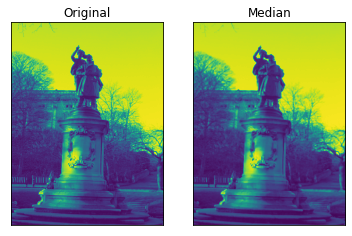

In [13]:
img = cv2.imread('ucid00002.tif', 0)
median = cv2.medianBlur(img, 3)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Median')
plt.xticks([]), plt.yticks([])
plt.show()

In [45]:
min(original), max(original)

(0.01355642372138152, 0.26990865385399493)

In [17]:
thresholds = np.arange(0, 1, 1/25)

# ROC curve for the classification between original images and their median-filtered versions

In [19]:
# For median 3x3
median3x3_true_positive_rates = []
median3x3_false_positive_rates = []

# For median 5x5
median5x5_true_positive_rates = []
median5x5_false_positive_rates = []

# For median 7x7
median7x7_true_positive_rates = []
median7x7_false_positive_rates = []

# For median 9x9
median9x9_true_positive_rates = []
median9x9_false_positive_rates = []

In [20]:
for threshold in thresholds:
    rates = data(median3x3, original, threshold)
    median3x3_true_positive_rates.append(rates[0])
    median3x3_false_positive_rates.append(rates[1])
    
    rates = data(median5x5, original, threshold)
    median5x5_true_positive_rates.append(rates[0])
    median5x5_false_positive_rates.append(rates[1])
    
    rates = data(median7x7, original, threshold)
    median7x7_true_positive_rates.append(rates[0])
    median7x7_false_positive_rates.append(rates[1])
    
    rates = data(median9x9, original, threshold)
    median9x9_true_positive_rates.append(rates[0])
    median9x9_false_positive_rates.append(rates[1])

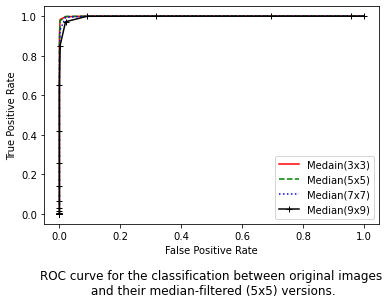

In [21]:
plt.plot(median3x3_false_positive_rates, median3x3_true_positive_rates, 'r', label='Medain(3x3)')
plt.plot(median5x5_false_positive_rates, median5x5_true_positive_rates, 'g--', label='Median(5x5)')
plt.plot(median7x7_false_positive_rates, median7x7_true_positive_rates, 'b:', label='Median(7x7)')
plt.plot(median9x9_false_positive_rates, median9x9_true_positive_rates, 'k-+', label='Median(9x9)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for the classification between original images\n and their median-filtered (5x5) versions.', y=-0.35)
plt.legend()
plt.show()

# ROC curve for the classification between the manipulated images and their median-filtered versiopns.

In [60]:
import os

# os.chdir("C:\\Users\\mkrem\\Google Drive\\Project\\Research\\ucid.v2")
os.chdir("/home/msc_2020/Downloads/Research/ucid.v2")


with open('bilinear0.6-median5x5.txt', 'w') as out:
    for i in range(1, 1339):
        if i==1338:
            print("done")
        name = 'ucid0'+str(i).zfill(4)+'.tif'
        I = cv2.imread(name, 0)
        dim = (int(I.shape[0]*0.6), int(I.shape[1]*0.6))
        I = cv2.medianBlur(cv2.resize(I, dim, interpolation = cv2.INTER_LINEAR), 5)
        out.write(str(caoICME10(I, 7, 100))+'\n')
        
with open('bilinear2-median5x5.txt', 'w') as out:
    for i in range(1, 1339):
        if i==1338:
            print("done")
        name = 'ucid0'+str(i).zfill(4)+'.tif'
        I = cv2.imread(name, 0)
        dim = (int(I.shape[0]*2), int(I.shape[1]*2))
        I = cv2.medianBlur(cv2.resize(I, dim, interpolation = cv2.INTER_LINEAR), 5)
        out.write(str(caoICME10(I, 7, 100))+'\n')
        
# with open('gaussian5x5-median5x5.txt', 'w') as out:
#     for i in range(1, 1339):
#         if i%100==0 or i==1338:
#             print(i)
#         name = 'ucid0'+str(i).zfill(4)+'.tif'
#         I = cv2.imread(name, 0)
#         I = cv2.medianBlur(cv2.GaussianBlur(I,(5,5), 0), 5)
#         out.write(str(caoICME10(I, 7, 100))+'\n')
        
# with open('average3x3-median5x5.txt', 'w') as out:
#     for i in range(1, 1339):
#         if i%100==0 or i==1338:
#             print(i)
#         name = 'ucid0'+str(i).zfill(4)+'.tif'
#         I = cv2.imread(name, 0)
#         I = cv2.medianBlur(cv2.blur(I,(3,3), 0), 5)
#         out.write(str(caoICME10(I, 7, 100))+'\n')
        
# with open('average5x5-median5x5.txt', 'w') as out:
#     for i in range(1, 1339):
#         if i%100==0 or i==1338:
#             print(i)
#         name = 'ucid0'+str(i).zfill(4)+'.tif'
#         I = cv2.imread(name, 0)
#         I = cv2.medianBlur(cv2.blur(I,(5,5), 0), 5)
#         out.write(str(caoICME10(I, 7, 100))+'\n')
        
# with open('gaussian5x5-median5x5.txt', 'w') as out:
#     for i in range(1, 1339):
#         if i%100==0 or i==1338:
#             print(i)
#         name = 'ucid0'+str(i).zfill(4)+'.tif'
#         I = cv2.imread(name, 0)
#         I = cv2.medianBlur(cv2.GaussianBlur(I,(5,5), 0), 5)
#         out.write(str(caoICME10(I, 7, 100))+'\n')

done
done


In [14]:
os.chdir("/mnt/drive2/msc_2020/ucid.v2/images_jpeg55")

with open('jpeg55-median5x5.txt', 'w') as out:
    for i in range(1, 1339):
        if i%200==0 or i==1338:
            print(i)
        name = 'ucid0'+str(i).zfill(4)+'.jpeg'
        I = cv2.imread(name, 0)
        I = cv2.medianBlur(I, 5)
        out.write(str(caoICME10(I, 7, 100))+'\n')
        
os.chdir("/mnt/drive2/msc_2020/ucid.v2/images_jpeg75")
with open('jpeg75-median5x5.txt', 'w') as out:
    for i in range(1, 1339):
        if i%200==0 or i==1338:
            print(i)
        name = 'ucid0'+str(i).zfill(4)+'.jpeg'
        I = cv2.imread(name, 0)
        I = cv2.medianBlur(I, 5)
        out.write(str(caoICME10(I, 7, 100))+'\n')
        
os.chdir("/mnt/drive2/msc_2020/ucid.v2/images_jpeg95")
with open('jpeg95-median5x5.txt', 'w') as out:
    for i in range(1, 1339):
        if i%200==0 or i==1338:
            print(i)
        name = 'ucid0'+str(i).zfill(4)+'.jpeg'
        I = cv2.imread(name, 0)
        I = cv2.medianBlur(I, 5)
        out.write(str(caoICME10(I, 7, 100))+'\n')

200
400
600
800
1000
1200
1338
200
400
600
800
1000
1200
1338
200
400
600
800
1000
1200
1338


In [15]:
os.chdir("./Data")
# os.chdir("/mnt/drive2/msc_2020/Cao_2010/Code/Data")

gaussian3x3_median5x5 = []
with open('gaussian3x3-median5x5.txt', 'r') as out:
    for _ in range(1338):
        gaussian3x3_median5x5.append(float(out.readline().strip()))
        
gaussian5x5_median5x5 = []
with open('gaussian5x5-median5x5.txt', 'r') as out:
    for _ in range(1338):
        gaussian5x5_median5x5.append(float(out.readline().strip()))
        
average3x3_median5x5 = []
with open('average3x3-median5x5.txt', 'r') as out:
    for _ in range(1338):
        average3x3_median5x5.append(float(out.readline().strip()))
        
average5x5_median5x5 = []
with open('average5x5-median5x5.txt', 'r') as out:
    for _ in range(1338):
        average5x5_median5x5.append(float(out.readline().strip()))
        
bilineardot6_median5x5 = []
with open('bilinear0.6-median5x5.txt', 'r') as out:
    for _ in range(1338):
        bilineardot6_median5x5.append(float(out.readline().strip()))
        
bilinear2_median5x5 = []
with open('bilinear2-median5x5.txt', 'r') as out:
    for _ in range(1338):
        bilinear2_median5x5.append(float(out.readline().strip()))
        
jpeg55_median5x5 = []
with open('jpeg55-median5x5.txt', 'r') as out:
    for _ in range(1338):
        jpeg55_median5x5.append(float(out.readline().strip()))

jpeg75_median5x5 = []
with open('jpeg75-median5x5.txt', 'r') as out:
    for _ in range(1338):
        jpeg75_median5x5.append(float(out.readline().strip()))
        
jpeg95_median5x5 = []
with open('jpeg95-median5x5.txt', 'r') as out:
    for _ in range(1338):
        jpeg95_median5x5.append(float(out.readline().strip()))

In [16]:
thresholds = np.arange(0, 1, 1/25)

In [17]:
Gaussian3x3_true_positive_rates = []
Gaussian3x3_false_positive_rates = []

Gaussian5x5_true_positive_rates = []
Gaussian5x5_false_positive_rates = []

average3x3_true_positive_rates = []
average3x3_false_positive_rates = []

average5x5_true_positive_rates = []
average5x5_false_positive_rates = []

bilineardot6_true_positive_rates = []
bilineardot6_false_positive_rates = []

bilinear2_true_positive_rates = []
bilinear2_false_positive_rates = []

jpeg55_true_positive_rates = []
jpeg55_false_positive_rates = []

jpeg75_true_positive_rates = []
jpeg75_false_positive_rates = []

jpeg95_true_positive_rates = []
jpeg95_false_positive_rates = []

In [19]:
for threshold in thresholds:
    rates = data(gaussian3x3_median5x5, gaussian3x3, threshold)
    Gaussian3x3_true_positive_rates.append(rates[0])
    Gaussian3x3_false_positive_rates.append(rates[1])
    
    rates = data(gaussian5x5_median5x5, gaussian5x5, threshold)
    Gaussian5x5_true_positive_rates.append(rates[0])
    Gaussian5x5_false_positive_rates.append(rates[1])
    
    rates = data(average3x3_median5x5, average3x3, threshold)
    average3x3_true_positive_rates.append(rates[0])
    average3x3_false_positive_rates.append(rates[1])
    
    rates = data(average5x5_median5x5, average5x5, threshold)
    average5x5_true_positive_rates.append(rates[0])
    average5x5_false_positive_rates.append(rates[1])
    
    rates = data(bilineardot6_median5x5, bilineardot6, threshold)
    bilineardot6_true_positive_rates.append(rates[0])
    bilineardot6_false_positive_rates.append(rates[1])
    
    rates = data(bilinear2_median5x5, bilinear2, threshold)
    bilinear2_true_positive_rates.append(rates[0])
    bilinear2_false_positive_rates.append(rates[1])
    
    rates = data(jpeg55_median5x5, jpeg55, threshold)
    jpeg55_true_positive_rates.append(rates[0])
    jpeg55_false_positive_rates.append(rates[1])
    
    rates = data(jpeg75_median5x5, jpeg75, threshold)
    jpeg75_true_positive_rates.append(rates[0])
    jpeg75_false_positive_rates.append(rates[1])
    
    rates = data(jpeg95_median5x5, jpeg95, threshold)
    jpeg95_true_positive_rates.append(rates[0])
    jpeg95_false_positive_rates.append(rates[1])

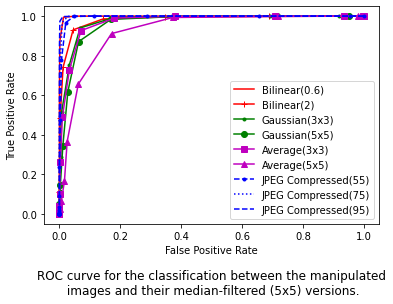

In [22]:
plt.plot(bilineardot6_false_positive_rates, bilineardot6_true_positive_rates, 'r', label='Bilinear(0.6)')
plt.plot(bilinear2_false_positive_rates, bilinear2_true_positive_rates, 'r+-', label='Bilinear(2)')
plt.plot(Gaussian3x3_false_positive_rates, Gaussian3x3_true_positive_rates, 'g.-', label='Gaussian(3x3)')
plt.plot(Gaussian5x5_false_positive_rates, Gaussian5x5_true_positive_rates, 'go-', label='Gaussian(5x5)')
plt.plot(average3x3_false_positive_rates, average3x3_true_positive_rates, 'ms-', label='Average(3x3)')
plt.plot(average5x5_false_positive_rates, average5x5_true_positive_rates, 'm^-', label='Average(5x5)')
plt.plot(jpeg55_false_positive_rates, jpeg55_true_positive_rates, 'b.--', label='JPEG Compressed(55)')
plt.plot(jpeg75_false_positive_rates, jpeg75_true_positive_rates, 'b:', label='JPEG Compressed(75)')
plt.plot(jpeg95_false_positive_rates, jpeg95_true_positive_rates, 'b--', label='JPEG Compressed(95)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for the classification between the manipulated\n images and their median-filtered (5x5) versions.', y=-0.35)
plt.legend()
# plt.figure(figsize=(4, 2), dpi= 50, facecolor='w', edgecolor='k')
plt.show()

# ROC curve for the classification between median-filtered (5x5) images and the images processed by other manipulations.

In [24]:
thresholds = np.arange(0, 1, 1/25)

In [25]:
bilineardot6_true_positive_rates = []
bilineardot6_false_positive_rates = []

bilinear2_true_positive_rates = []
bilinear2_false_positive_rates = []

gaussian3x3_true_positive_rates = []
gaussian3x3_false_positive_rates = []

gaussian5x5_true_positive_rates = []
gaussian5x5_false_positive_rates = []

average3x3_true_positive_rates = []
average3x3_false_positive_rates = []

average5x5_true_positive_rates = []
average5x5_false_positive_rates = []

jpeg55_true_positive_rates = []
jpeg55_false_positive_rates = []

jpeg75_true_positive_rates = []
jpeg75_false_positive_rates = []

jpeg95_true_positive_rates = []
jpeg95_false_positive_rates = []

In [26]:
for threshold in thresholds:
    rates = data(median5x5, bilineardot6, threshold)
    bilineardot6_true_positive_rates.append(rates[0])
    bilineardot6_false_positive_rates.append(rates[1])
    
    rates = data(median5x5, bilinear2, threshold)
    bilinear2_true_positive_rates.append(rates[0])
    bilinear2_false_positive_rates.append(rates[1])
    
    rates = data(median5x5, average3x3, threshold)
    average3x3_true_positive_rates.append(rates[0])
    average3x3_false_positive_rates.append(rates[1])
    
    rates = data(median5x5, average5x5, threshold)
    average5x5_true_positive_rates.append(rates[0])
    average5x5_false_positive_rates.append(rates[1])
    
    rates = data(median5x5, gaussian3x3, threshold)
    gaussian3x3_true_positive_rates.append(rates[0])
    gaussian3x3_false_positive_rates.append(rates[1])
    
    rates = data(median5x5, gaussian5x5, threshold)
    gaussian5x5_true_positive_rates.append(rates[0])
    gaussian5x5_false_positive_rates.append(rates[1])
    
    rates = data(median5x5, jpeg55, threshold)
    jpeg55_true_positive_rates.append(rates[0])
    jpeg55_false_positive_rates.append(rates[1])
    
    rates = data(median5x5, jpeg75, threshold)
    jpeg75_true_positive_rates.append(rates[0])
    jpeg75_false_positive_rates.append(rates[1])
    
    rates = data(median5x5, jpeg95, threshold)
    jpeg95_true_positive_rates.append(rates[0])
    jpeg95_false_positive_rates.append(rates[1])

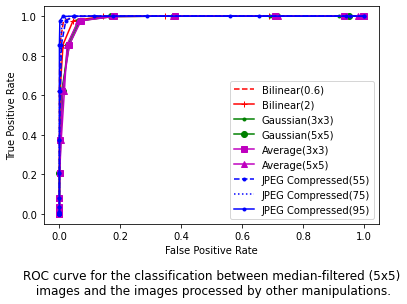

In [27]:
plt.plot(bilineardot6_false_positive_rates, bilineardot6_true_positive_rates, 'r--', label='Bilinear(0.6)')
plt.plot(bilinear2_false_positive_rates, bilinear2_true_positive_rates, 'r+-', label='Bilinear(2)')
plt.plot(gaussian3x3_false_positive_rates, gaussian3x3_true_positive_rates, 'g.-', label='Gaussian(3x3)')
plt.plot(gaussian5x5_false_positive_rates, gaussian5x5_true_positive_rates, 'go-', label='Gaussian(5x5)')
plt.plot(average3x3_false_positive_rates, average3x3_true_positive_rates, 'ms-', label='Average(3x3)')
plt.plot(average5x5_false_positive_rates, average5x5_true_positive_rates, 'm^-', label='Average(5x5)')
plt.plot(jpeg55_false_positive_rates, jpeg55_true_positive_rates, 'b--.', label='JPEG Compressed(55)')
plt.plot(jpeg75_false_positive_rates, jpeg75_true_positive_rates, 'b:', label='JPEG Compressed(75)')
plt.plot(jpeg95_false_positive_rates, jpeg95_true_positive_rates, 'b.-', label='JPEG Compressed(95)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for the classification between median-filtered (5x5)\n images and the images processed by other manipulations.', y=-0.35)
plt.legend()
# plt.figure(figsize=(8, 6), dpi= 100)
plt.show()

# ROC curve for the classification between the manipulated images and the post-manipulated median-filtered (5x5) images.

In [15]:
# os.chdir("C:\\Users\\mkrem\\Google Drive\\Project\\Research\\ucid.v2")
os.chdir("/mnt/drive2/msc_2020/ucid.v2")


with open('median5x5-bilinear0.6.txt', 'w') as out:
    for i in range(1, 1339):
        if i==1338:
            print("done")
        name = 'ucid0'+str(i).zfill(4)+'.tif'
        I = cv2.imread(name, 0)
        dim = (int(I.shape[0]*0.6), int(I.shape[1]*0.6))
        I = cv2.resize(cv2.medianBlur(I, 5), dim, interpolation = cv2.INTER_LINEAR)
        out.write(str(caoICME10(I, 7, 100))+'\n')
        
with open('median5x5-bilinear2.txt', 'w') as out:
    for i in range(1, 1339):
        if i==1338:
            print("done")
        name = 'ucid0'+str(i).zfill(4)+'.tif'
        I = cv2.imread(name, 0)
        dim = (int(I.shape[0]*2), int(I.shape[1]*2))
        I = cv2.resize(cv2.medianBlur(I, 5), dim, interpolation = cv2.INTER_LINEAR)
        out.write(str(caoICME10(I, 7, 100))+'\n')
        
with open('median5x5-gaussian3x3.txt', 'w') as out:
    for i in range(1, 1339):
        if i%100==0 or i==1338:
            print(i)
        name = 'ucid0'+str(i).zfill(4)+'.tif'
        I = cv2.imread(name, 0)
        I = cv2.GaussianBlur(cv2.medianBlur(I, 5),(3,3), 0)
        out.write(str(caoICME10(I, 7, 100))+'\n')
        
with open('median5x5-gaussian5x5.txt', 'w') as out:
    for i in range(1, 1339):
        if i%100==0 or i==1338:
            print(i)
        name = 'ucid0'+str(i).zfill(4)+'.tif'
        I = cv2.imread(name, 0)
        I = cv2.GaussianBlur(cv2.medianBlur(I, 5),(5,5), 0)
        out.write(str(caoICME10(I, 7, 100))+'\n')
        
with open('median5x5-average3x3.txt', 'w') as out:
    for i in range(1, 1339):
        if i%100==0 or i==1338:
            print(i)
        name = 'ucid0'+str(i).zfill(4)+'.tif'
        I = cv2.imread(name, 0)
        I = cv2.blur(cv2.medianBlur(I, 5),(3,3), 0)
        out.write(str(caoICME10(I, 7, 100))+'\n')
        
with open('median5x5-average5x5.txt', 'w') as out:
    for i in range(1, 1339):
        if i%100==0 or i==1338:
            print(i)
        name = 'ucid0'+str(i).zfill(4)+'.tif'
        I = cv2.imread(name, 0)
        I = cv2.blur(cv2.medianBlur(I, 5),(5,5), 0)
        out.write(str(caoICME10(I, 7, 100))+'\n')

In [39]:
os.chdir("/mnt/drive2/msc_2020/ucid.v2/MF5/MF5jpeg55")
with open('median5x5-jpeg55.txt', 'w') as out:
    for i in range(1, 1339):
        if i%200==0 or i==1338:
            print(i)
        name = 'ucid0'+str(i).zfill(4)+'.jpeg'
        I = cv2.imread(name, 0)
        out.write(str(caoICME10(I, 7, 100))+'\n')
        
os.chdir("/mnt/drive2/msc_2020/ucid.v2/MF5/MF5jpeg75")
with open('median5x5-jpeg75.txt', 'w') as out:
    for i in range(1, 1339):
        if i%200==0 or i==1338:
            print(i)
        name = 'ucid0'+str(i).zfill(4)+'.jpeg'
        I = cv2.imread(name, 0)
        out.write(str(caoICME10(I, 7, 100))+'\n')
        
os.chdir("/mnt/drive2/msc_2020/ucid.v2/MF5/MF5jpeg95")
with open('median5x5-jpeg95.txt', 'w') as out:
    for i in range(1, 1339):
        if i%200==0 or i==1338:
            print(i)
        name = 'ucid0'+str(i).zfill(4)+'.jpeg'
        I = cv2.imread(name, 0)
        out.write(str(caoICME10(I, 7, 100))+'\n')

200
400
600
800
1000
1200
1338
200
400
600
800
1000
1200
1338
200
400
600
800
1000
1200
1338


In [40]:
thresholds = np.arange(0, 1, 1/25)

In [42]:
# os.chdir("C:\\Users\\mkrem\\Google Drive\\Project\\Research\\Code\\Data")
os.chdir("/mnt/drive2/msc_2020/Cao_2010/Code/Data")

median5x5_gaussian3x3 = []
with open('median5x5-gaussian3x3.txt', 'r') as out:
    for _ in range(1338):
        median5x5_gaussian3x3.append(float(out.readline().strip()))
        
median5x5_gaussian5x5 = []
with open('median5x5-gaussian5x5.txt', 'r') as out:
    for _ in range(1338):
        median5x5_gaussian5x5.append(float(out.readline().strip()))
        
median5x5_average3x3 = []
with open('median5x5-average3x3.txt', 'r') as out:
    for _ in range(1338):
        median5x5_average3x3.append(float(out.readline().strip()))
        
median5x5_average5x5 = []
with open('median5x5-average5x5.txt', 'r') as out:
    for _ in range(1338):
        median5x5_average5x5.append(float(out.readline().strip()))
        
median5x5_bilineardot6 = []
with open('median5x5-bilinear0.6.txt', 'r') as out:
    for _ in range(1338):
        median5x5_bilineardot6.append(float(out.readline().strip()))
        
median5x5_bilinear2 = []
with open('median5x5-bilinear2.txt', 'r') as out:
    for _ in range(1338):
        median5x5_bilinear2.append(float(out.readline().strip()))
        
median5x5_jpeg55 = []
with open('median5x5-jpeg55.txt', 'r') as out:
    for _ in range(1338):
        median5x5_jpeg55.append(float(out.readline().strip()))
        
median5x5_jpeg75 = []
with open('median5x5-jpeg75.txt', 'r') as out:
    for _ in range(1338):
        median5x5_jpeg75.append(float(out.readline().strip()))
        
median5x5_jpeg95 = []
with open('median5x5-jpeg95.txt', 'r') as out:
    for _ in range(1338):
        median5x5_jpeg95.append(float(out.readline().strip()))

In [43]:
bilineardot6_true_positive_rates = []
bilineardot6_false_positive_rates = []

bilinear2_true_positive_rates = []
bilinear2_false_positive_rates = []

gaussian3x3_true_positive_rates = []
gaussian3x3_false_positive_rates = []

gaussian5x5_true_positive_rates = []
gaussian5x5_false_positive_rates = []

average3x3_true_positive_rates = []
average3x3_false_positive_rates = []

average5x5_true_positive_rates = []
average5x5_false_positive_rates = []

jpeg55_true_positive_rates = []
jpeg55_false_positive_rates = []

jpeg75_true_positive_rates = []
jpeg75_false_positive_rates = []

jpeg95_true_positive_rates = []
jpeg95_false_positive_rates = []

In [45]:
for threshold in thresholds:
    rates = data(median5x5_bilineardot6, bilineardot6, threshold)
    bilineardot6_true_positive_rates.append(rates[0])
    bilineardot6_false_positive_rates.append(rates[1])
    
    rates = data(median5x5_bilinear2, bilinear2, threshold)
    bilinear2_true_positive_rates.append(rates[0])
    bilinear2_false_positive_rates.append(rates[1])
    
    rates = data(median5x5_average3x3, average3x3, threshold)
    average3x3_true_positive_rates.append(rates[0])
    average3x3_false_positive_rates.append(rates[1])
    
    rates = data(median5x5_average5x5, average5x5, threshold)
    average5x5_true_positive_rates.append(rates[0])
    average5x5_false_positive_rates.append(rates[1])
    
    rates = data(median5x5_gaussian3x3, gaussian3x3, threshold)
    gaussian3x3_true_positive_rates.append(rates[0])
    gaussian3x3_false_positive_rates.append(rates[1])
    
    rates = data(median5x5_gaussian5x5, gaussian5x5, threshold)
    gaussian5x5_true_positive_rates.append(rates[0])
    gaussian5x5_false_positive_rates.append(rates[1])
    
    rates = data(median5x5_jpeg55, jpeg55, threshold)
    jpeg55_true_positive_rates.append(rates[0])
    jpeg55_false_positive_rates.append(rates[1])
    
    rates = data(median5x5_jpeg75, jpeg75, threshold)
    jpeg75_true_positive_rates.append(rates[0])
    jpeg75_false_positive_rates.append(rates[1])
    
    rates = data(median5x5_jpeg95, jpeg95, threshold)
    jpeg95_true_positive_rates.append(rates[0])
    jpeg95_false_positive_rates.append(rates[1])

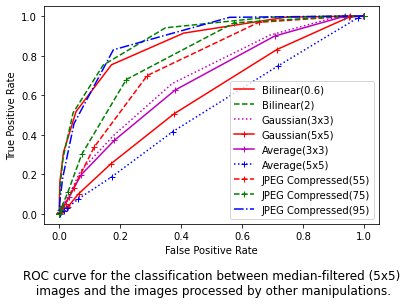

In [51]:
plt.plot(bilineardot6_false_positive_rates, bilineardot6_true_positive_rates, 'r', label='Bilinear(0.6)')
plt.plot(bilinear2_false_positive_rates, bilinear2_true_positive_rates, 'g--', label='Bilinear(2)')
plt.plot(gaussian3x3_false_positive_rates, gaussian3x3_true_positive_rates, 'm:', label='Gaussian(3x3)')
plt.plot(gaussian5x5_false_positive_rates, gaussian5x5_true_positive_rates, 'r+-', label='Gaussian(5x5)')
plt.plot(average3x3_false_positive_rates, average3x3_true_positive_rates, 'm-+', label='Average(3x3)')
plt.plot(average5x5_false_positive_rates, average5x5_true_positive_rates, 'b:+', label='Average(5x5)')
plt.plot(jpeg55_false_positive_rates, jpeg55_true_positive_rates, 'r+--', label='JPEG Compressed(55)')
plt.plot(jpeg75_false_positive_rates, jpeg75_true_positive_rates, 'g+--', label='JPEG Compressed(75)')
plt.plot(jpeg95_false_positive_rates, jpeg95_true_positive_rates, 'b-.', label='JPEG Compressed(95)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for the classification between median-filtered (5x5)\n images and the images processed by other manipulations.', y=-0.35)
plt.legend()
# plt.figure(figsize=(8, 6), dpi= 100)
plt.show()